In [1]:
import pandas as pd
import csv
import json
import numpy as np
from census import Census
import requests
from us import states
from api_key import weather_key
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy import stats

In [15]:
#call on spring accident file
file_path = 'spring_accidents.csv'

spring_accidents = pd.read_csv(file_path)

In [3]:
file_path2= 'final_accident.csv'

final_accident_df = pd.read_csv(file_path2)
#total US accidents
us_total = final_accident_df['Date'].count()
us_total

953733

In [4]:
#total spring accidents
spring_totals = spring_accidents['Date'].count()
spring_totals

216266

In [5]:
#% of spring totals (turn into pie chart with all seasons) 
spring_percent = (spring_totals / us_total) * 100
spring_percent

22.67573838799748

In [6]:
#overall stats for spring
spring_accidents.describe()

,Start_Lat,Start_Lng,Temperature(F),Wind_Chill(F),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,216266.000000,216266.000000,213644.000000,166690.000000,213120.000000,201226.000000,150035.000000
mean,36.564158,-94.315457,59.889665,59.254556,9.261920,8.459845,0.007591
std,4.824170,16.668072,15.944444,18.954061,2.630569,5.386375,0.046190
min,24.555269,-124.534439,-33.000000,-54.000000,0.000000,0.000000,0.000000
25%,33.626248,-111.917160,50.000000,50.000000,10.000000,5.000000,0.000000
50%,35.863445,-87.994652,61.000000,63.000000,10.000000,8.000000,0.000000
75%,40.463917,-80.847496,71.600000,73.000000,10.000000,12.000000,0.000000
max,48.998241,-67.703370,170.600000,102.000000,90.000000,175.000000,2.430000


In [14]:
#lots of 0's in previous hist. Filter DF so data is greater than 1(in)
precipitation_adjust = spring_accidents[spring_accidents['Precipitation(in)'] > 1]
len(precipitation_adjust)

53

In [47]:
file_path3 = 'summer_accidents.csv'

summer_accidents = pd.read_csv(file_path3)
summer_accidents.head()

,Date,Time,Start_Time,Start_Lat,Start_Lng,City,State,Weather_Timestamp,Temperature(F),Wind_Chill(F),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition
0,2019-08-21,04:32:56,2019-08-21 04:32:56,40.600681,-95.675400,Hamburg,IA,2019-08-21 04:35:00,72.0,72.0,7.0,W,12.0,0.17,Light Rain with Thunder
1,2019-08-21,04:32:56,2019-08-21 04:32:56,40.600689,-95.680099,Hamburg,IA,2019-08-21 04:35:00,72.0,72.0,7.0,W,12.0,0.17,Light Rain with Thunder
2,2019-07-14,13:19:10,2019-07-14 13:19:10,40.821640,-95.807564,Thurman,IA,2019-07-14 13:15:00,89.0,89.0,10.0,SSE,10.0,0.00,Fair
3,2019-07-14,13:19:10,2019-07-14 13:19:10,40.825241,-95.806221,Thurman,IA,2019-07-14 13:15:00,89.0,89.0,10.0,SSE,10.0,0.00,Fair
4,2019-08-31,12:39:20,2019-08-31 12:39:20,42.891327,-78.888199,Buffalo,NY,2019-08-31 12:54:00,68.0,68.0,10.0,NW,6.0,0.00,Mostly Cloudy


In [48]:
#total summer accidents
summer_totals = summer_accidents['Date'].count()
summer_totals

208981

In [49]:
#% of summer totals (turn into pie chart with all seasons) 
summer_percent = (summer_totals / us_total) * 100
summer_percent

21.91189777432468

In [50]:
#overall stats for summer
summer_accidents.describe()

,Start_Lat,Start_Lng,Temperature(F),Wind_Chill(F),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,208981.000000,208981.000000,204259.000000,201907.000000,203907.000000,202588.000000,198329.00000
mean,36.582221,-94.848866,77.995486,77.968243,9.555908,6.822299,0.00646
std,4.975689,16.824861,10.346665,10.357638,2.400196,4.785076,0.05768
min,24.557400,-124.497567,30.000000,23.000000,0.000000,0.000000,0.00000
25%,33.494961,-112.010246,71.000000,71.000000,10.000000,3.000000,0.00000
50%,35.892502,-89.574478,78.000000,78.000000,10.000000,7.000000,0.00000
75%,40.626579,-80.874863,85.000000,85.000000,10.000000,9.000000,0.00000
max,48.990560,-67.903005,115.000000,115.000000,101.000000,161.000000,3.35000


In [52]:
file_path4 = 'fall_accidents.csv'

fall_accidents = pd.read_csv(file_path4)
fall_accidents.head()

,Date,Time,Start_Time,Start_Lat,Start_Lng,City,State,Weather_Timestamp,Temperature(F),Wind_Chill(F),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition
0,2019-11-30,23:25:52,2019-11-30 23:25:52,40.391392,-74.183060,Holmdel,NJ,2019-11-30 22:56:00,30.0,30.0,10.0,NW,3.0,0.0,Fair
1,2019-11-30,22:26:01,2019-11-30 22:26:01,40.731777,-73.872086,Elmhurst,NY,2019-11-30 22:51:00,36.0,30.0,10.0,NNE,8.0,0.0,Mostly Cloudy
2,2019-11-30,22:45:22,2019-11-30 22:45:22,39.786331,-105.077538,Arvada,CO,2019-11-30 22:48:00,25.0,19.0,10.0,E,5.0,0.0,Fair
3,2019-11-30,22:40:00,2019-11-30 22:40:00,39.787380,-105.079399,Arvada,CO,2019-11-30 22:48:00,25.0,19.0,10.0,E,5.0,0.0,Fair
4,2019-11-30,22:13:25,2019-11-30 22:13:25,47.216614,-122.462830,Tacoma,WA,2019-11-30 21:58:00,28.0,28.0,10.0,CALM,0.0,0.0,Mostly Cloudy


In [53]:
#total fall accidents
fall_totals = fall_accidents['Date'].count()
fall_totals

276370

In [54]:
#% of fall totals (turn into pie chart with all seasons) 
fall_percent = (fall_totals / us_total) * 100
fall_percent

28.977711791455263

In [55]:
#overall stats for fall
fall_accidents.describe()

,Start_Lat,Start_Lng,Temperature(F),Wind_Chill(F),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,276370.000000,276370.000000,271150.000000,268981.000000,271106.000000,269838.000000,261404.000000
mean,36.532391,-99.361083,63.781095,62.954774,9.262207,6.566040,0.003889
std,4.676345,17.799583,16.991952,18.476979,2.463293,5.256934,0.074373
min,24.560246,-124.497523,-6.000000,-20.000000,0.000000,0.000000,0.000000
25%,33.791965,-118.177689,53.000000,53.000000,10.000000,3.000000,0.000000
50%,35.655519,-95.938704,65.000000,65.000000,10.000000,6.000000,0.000000
75%,39.939156,-82.157726,76.000000,76.000000,10.000000,9.000000,0.000000
max,49.002201,-67.841858,111.000000,111.000000,130.000000,255.000000,25.000000


In [34]:
file_path5 = 'winter_accidents.csv'

winter_accidents = pd.read_csv(file_path5)
winter_accidents.head()

,Date,Time,Start_Time,Start_Lat,Start_Lng,City,State,Weather_Timestamp,Temperature(F),Wind_Chill(F),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition
0,2019-12-26,17:09:52,2019-12-26 17:09:52,40.884850,-95.800362,Thurman,IA,2019-12-26 17:15:00,31.0,31.0,10.0,CALM,0.0,0.0,Fair
1,2019-12-26,17:10:32,2019-12-26 17:10:32,40.889641,-95.798630,Thurman,IA,2019-12-26 17:15:00,31.0,31.0,10.0,CALM,0.0,0.0,Fair
2,2019-12-31,23:49:36,2019-12-31 23:49:36,42.313499,-83.091225,Detroit,MI,2019-12-31 23:53:00,28.0,17.0,7.0,WSW,13.0,0.0,Cloudy
3,2019-12-31,23:50:02,2019-12-31 23:50:02,42.398125,-83.109009,Detroit,MI,2019-12-31 23:53:00,28.0,17.0,7.0,WSW,13.0,0.0,Cloudy
4,2019-12-31,23:29:03,2019-12-31 23:29:03,39.754967,-75.276283,Swedesboro,NJ,2019-12-31 23:54:00,43.0,36.0,10.0,WNW,14.0,0.0,Mostly Cloudy


In [35]:
#total winter accidents
winter_totals = winter_accidents['Date'].count()
winter_totals

252116

In [36]:
#% of winter totals (turn into pie chart with all seasons) 
winter_percent = (winter_totals / us_total) * 100
winter_percent

26.434652046222578

In [59]:
#overall stats for winter
winter_accidents.describe()

,Start_Lat,Start_Lng,Temperature(F),Wind_Chill(F),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,252116.000000,252116.000000,247543.000000,166957.000000,247165.000000,220038.000000,124868.000000
mean,37.068403,-97.233339,43.922342,35.032692,8.293417,8.091078,0.013431
std,4.897515,17.495987,16.537185,20.123500,3.586587,5.498180,0.045101
min,24.567459,-124.497420,-32.800000,-59.000000,0.000000,0.000000,0.000000
25%,33.862272,-117.861963,33.000000,22.800000,7.000000,4.600000,0.000000
50%,36.744980,-93.297911,45.000000,35.000000,10.000000,7.000000,0.000000
75%,40.765421,-81.457291,55.900000,51.000000,10.000000,11.500000,0.000000
max,49.000759,-67.840204,90.000000,86.000000,90.000000,230.000000,2.070000


<ipython-input-85-6e6975921ddd>:9: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(totals, labels = labels,


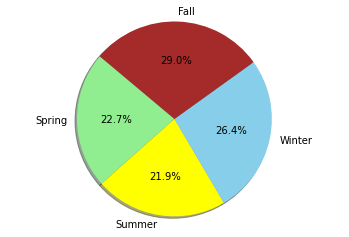

<Figure size 720x720 with 0 Axes>

In [85]:
labels = ['Spring', 'Summer', 'Winter', 'Fall']
accident_percents = [22.67573838799748, 21.91189777432468, 26.434652046222578, 28.977711791455263]

label = [labels]
totals = [accident_percents]
colors = ["lightgreen", "yellow", "skyblue", "brown"]

# Tell matplotlib to create a pie chart based upon the above data
plt.pie(totals, labels = labels, 
        colors = colors, autopct="%1.1f%%", shadow=True, startangle = 140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
#print the final product to the screen
fig = plt.figure(figsize=(10,10))
plt.show()